In [40]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os
import numpy as np
import time

%matplotlib inline

Загружаем встроенный в OpenCV face detector:

In [41]:
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

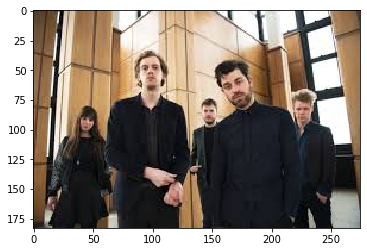

In [42]:
img = cv2.imread('test1.jpg')
img_norm = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_norm, cmap='gray')
plt.show()

Переводим изображение в чб, так как именно такой формат принимает данный классификатор:

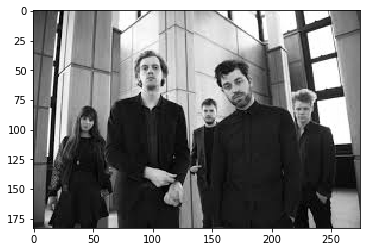

In [43]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

Вычисляем bboxes с дефолтными параметрами:

In [44]:
face_boxes = face_detector.detectMultiScale(img_gray)
face_boxes

array([[86, 38, 24, 24]], dtype=int32)

In [45]:
def plot_img_with_faces(init_img, boxes_coords):
    # Create figure and axes
    fig,ax = plt.subplots(1)
    # Display the image
    ax.imshow(init_img, cmap='gray')
    for box in boxes_coords:
        # Create a Rectangle patch
        rect = patches.Rectangle((box[0], box[1]), box[2], box[3],linewidth=1,edgecolor='r',facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)
    plt.show()

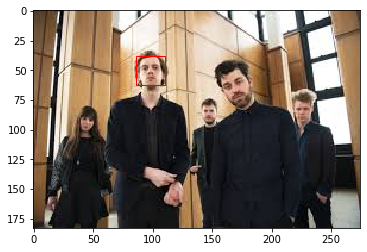

In [46]:
plot_img_with_faces(img_norm, face_boxes)

Запустим все это на пачке изображений:

In [47]:
def find_faces(img_name):
    img = cv2.imread(img_name)
    img_norm = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_boxes = face_detector.detectMultiScale(img_gray)
    plot_img_with_faces(img_norm, face_boxes)

In [48]:
drivers = [f for f in os.listdir('./') if os.path.isfile(os.path.join('./', f)) if 'jpg' in f]
drivers

['test4.jpg',
 'test6.jpg',
 'test1.jpg',
 'test5.jpg',
 'test2.jpg',
 'test3.jpg',
 'test7.jpg']

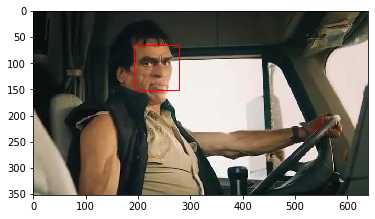

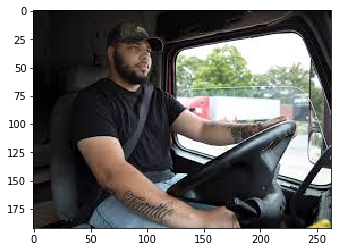

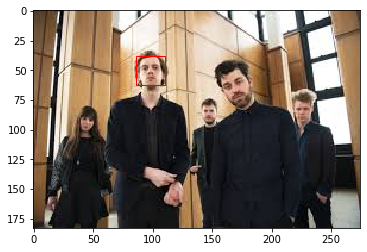

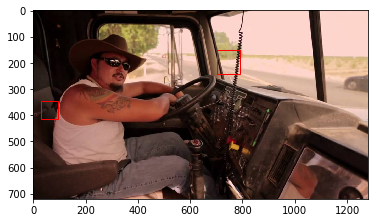

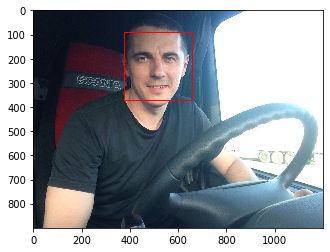

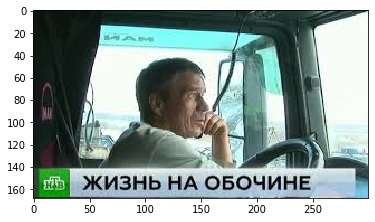

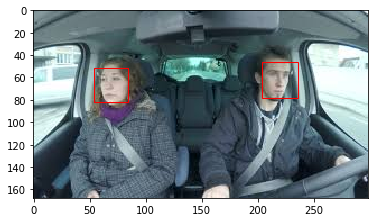

Average time is: 1.5 seconds


In [49]:
sum_time = 0
start = time.time()
for driver in drivers:
    find_faces(driver)
end = time.time()
sum_time = end - start
print('Average time is: {:.2} seconds'.format(sum_time))